In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv(r'/Users/mahimaadvilkar/Desktop/MahimaAdvilkar/Customer Churn Modelling/Churn_Modelling.csv')


In [3]:
#Data Exploring and Cleaning

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [9]:
print(df.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

In [10]:
#Plotting some Visuals (1. Distribution of Exited Customers (Churn Rate))

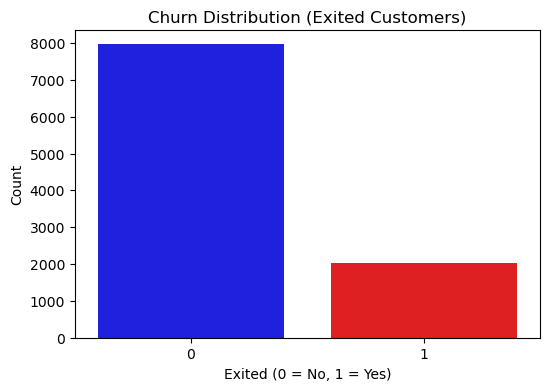

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['Exited'], palette=['blue', 'red'])
plt.title("Churn Distribution (Exited Customers)")
plt.xlabel("Exited (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


In [12]:
#CATEGORICAL DATA COUNT AND VISUALS

In [13]:
 # Counts of customers in each country

print(df['Geography'].value_counts()) 

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


In [14]:
 # Male vs. Female count

print(df['Gender'].value_counts()) 


Male      5457
Female    4543
Name: Gender, dtype: int64


In [15]:
 # How many customers use 1, 2, 3, or 4 products


print(df['NumOfProducts'].value_counts()) 

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


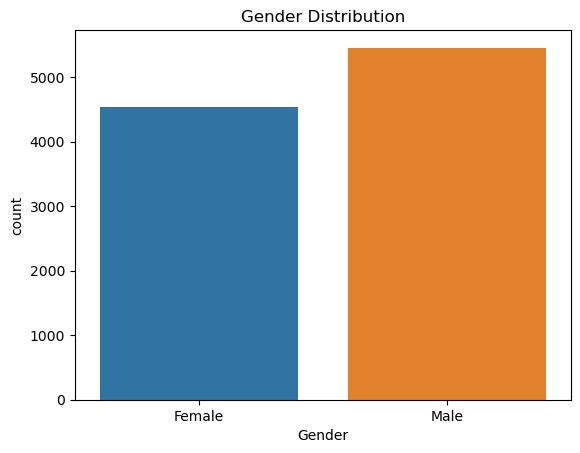

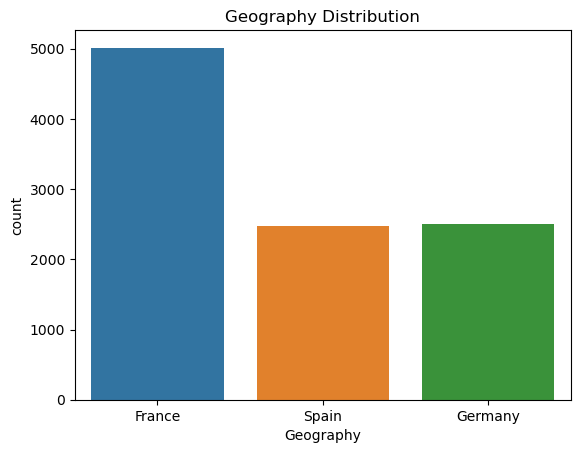

In [16]:
import seaborn as sns

# Bar plot for Gender
sns.countplot(x=df['Gender'])
plt.title("Gender Distribution")
plt.show()

# Bar plot for Geography
sns.countplot(x=df['Geography'])
plt.title("Geography Distribution")
plt.show()

In [17]:
#Histogram for Numeric Variables

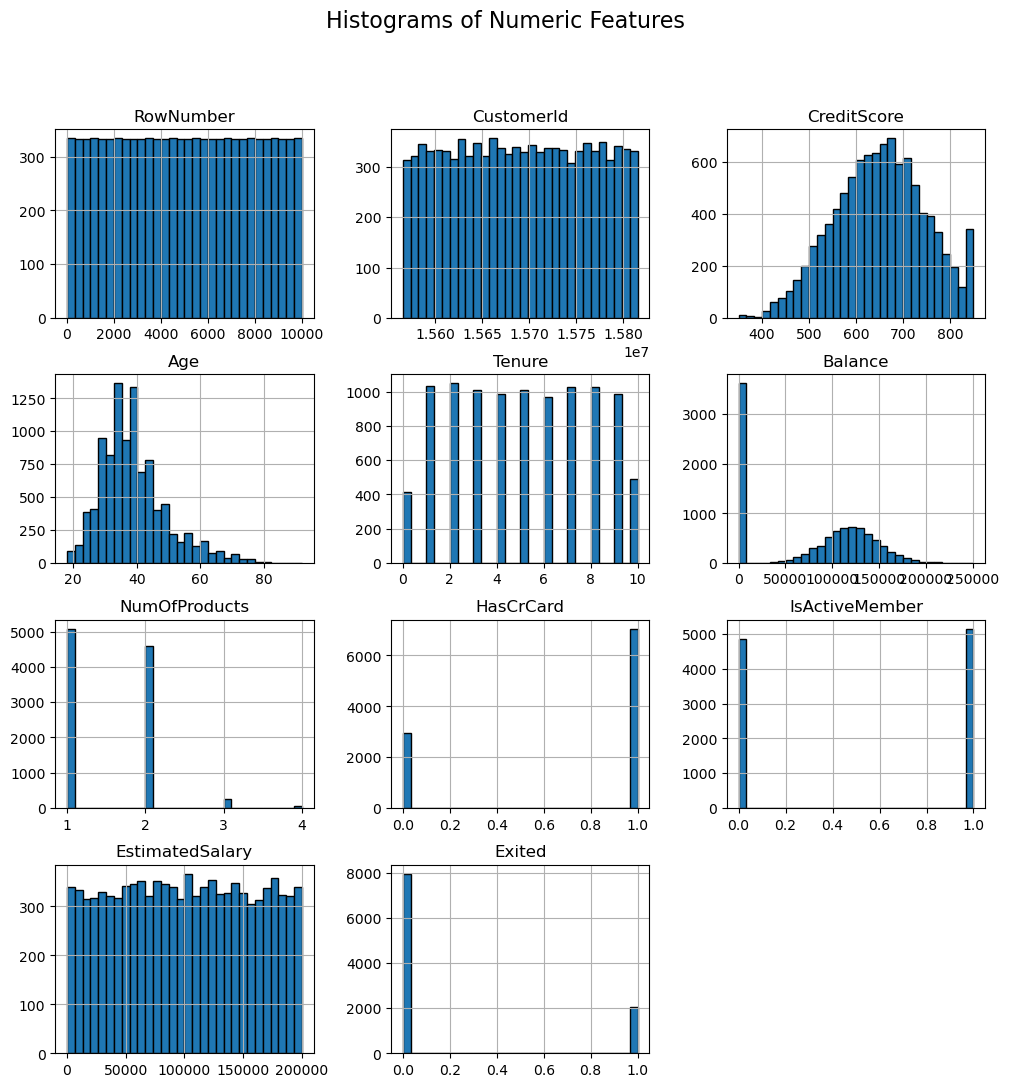

In [18]:
df.hist(figsize=(12,12), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()


In [19]:
#BOXPLOT TO CHECK OUTLIERS

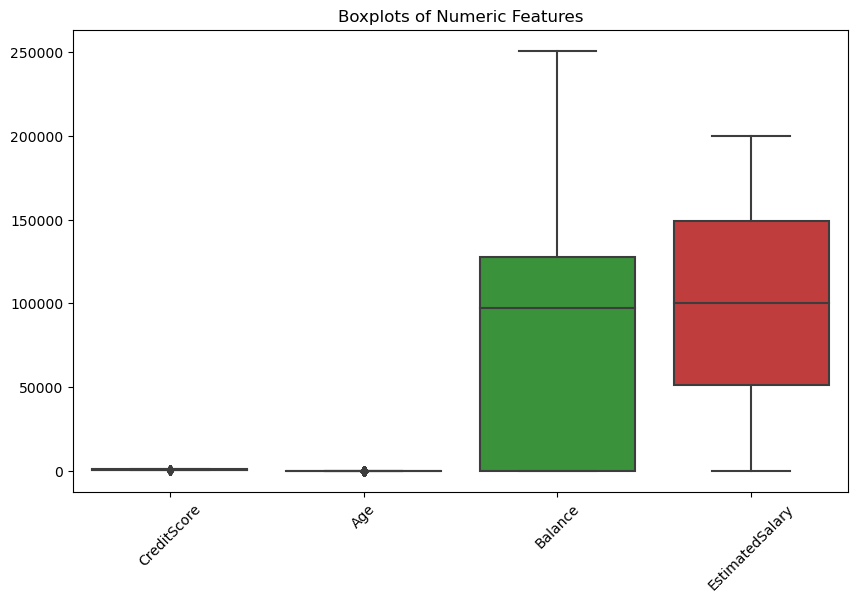

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']])
plt.title("Boxplots of Numeric Features")
plt.xticks(rotation=45)
plt.show()


In [21]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns= ['Geography'], drop_first= True)

In [22]:
df.head

<bound method NDFrame.head of       RowNumber  CustomerId    Surname  CreditScore  Gender  Age  Tenure  \
0             1    15634602   Hargrave          619       0   42       2   
1             2    15647311       Hill          608       0   41       1   
2             3    15619304       Onio          502       0   42       8   
3             4    15701354       Boni          699       0   39       1   
4             5    15737888   Mitchell          850       0   43       2   
...         ...         ...        ...          ...     ...  ...     ...   
9995       9996    15606229   Obijiaku          771       1   39       5   
9996       9997    15569892  Johnstone          516       1   35      10   
9997       9998    15584532        Liu          709       0   36       7   
9998       9999    15682355  Sabbatini          772       1   42       3   
9999      10000    15628319     Walker          792       0   28       4   

        Balance  NumOfProducts  HasCrCard  IsActiveMember

In [23]:
features= ['CreditScore', 'Gender', 'Age', "Tenure", "Balance", 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', "Geography_Germany", "Geography_Spain"]

X= df[features]
Y= df["Exited"]

In [24]:
#Splitting Data into training and Testing #80% will be training data and 20% is testing data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [26]:
#Scaling the dataset 

Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [27]:
X_train[:5], X_test[:5]

(array([[ 0.35649971,  0.91324755, -0.6557859 ,  0.34567966, -1.21847056,
          0.80843615,  0.64920267,  0.97481699,  1.36766974, -0.57946723,
         -0.57638802],
        [-0.20389777,  0.91324755,  0.29493847, -0.3483691 ,  0.69683765,
          0.80843615,  0.64920267,  0.97481699,  1.6612541 ,  1.72572313,
         -0.57638802],
        [-0.96147213,  0.91324755, -1.41636539, -0.69539349,  0.61862909,
         -0.91668767,  0.64920267, -1.02583358, -0.25280688, -0.57946723,
          1.73494238],
        [-0.94071667, -1.09499335, -1.13114808,  1.38675281,  0.95321202,
         -0.91668767,  0.64920267, -1.02583358,  0.91539272, -0.57946723,
         -0.57638802],
        [-1.39733684,  0.91324755,  1.62595257,  1.38675281,  1.05744869,
         -0.91668767, -1.54035103, -1.02583358, -1.05960019, -0.57946723,
         -0.57638802]]),
 array([[-0.57749609,  0.91324755, -0.6557859 , -0.69539349,  0.32993735,
          0.80843615, -1.54035103, -1.02583358, -1.01960511,  1.72572

In [28]:
# 1st Model I will be using is Random Forest 

In [29]:
model= RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [30]:
Y_PRED = model.predict(X_test)

In [31]:
conf_matrix= confusion_matrix(Y_test, Y_PRED)
class_report= classification_report(Y_test, Y_PRED)
accuracy= accuracy_score(Y_test, Y_PRED)

In [32]:
print(conf_matrix)
print(class_report)
print(accuracy)

[[1550   57]
 [ 208  185]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

0.8675


In [33]:
# Confusion matrix is the table use dto evaulate the performance of the classfication table


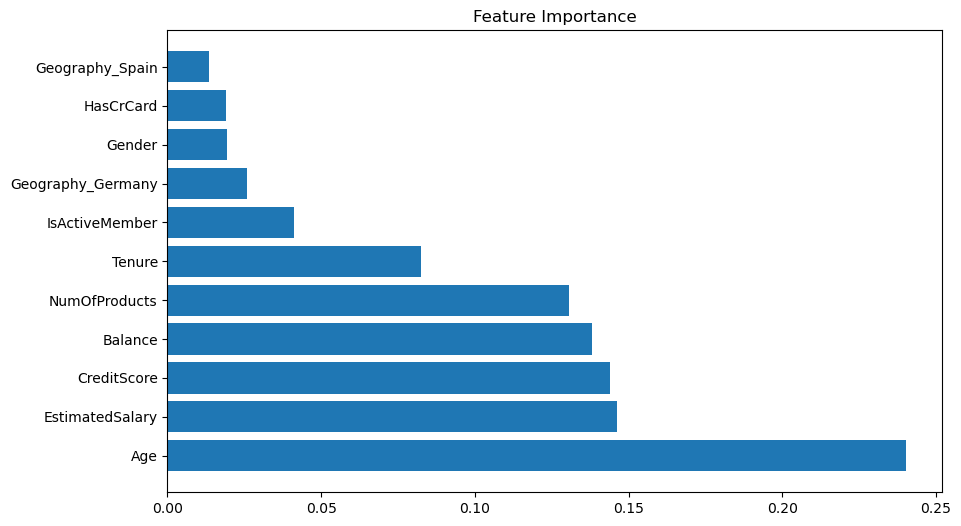

In [34]:
#Feature Importance

importances= model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [features[i] for i in indices]

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices])
plt.yticks(range(X.shape[1]), names)
plt.show()

In [35]:
#LOGISTIC REGRESSIONA

In [36]:
from sklearn.linear_model import LogisticRegression

#Build and train Logistics Regression Model

log_reg= LogisticRegression(random_state=42)
log_reg.fit(X_train, Y_train)

#Make Prediction
y_pred_log_reg = log_reg.predict(X_test)

#Evaluate the model
conf_matrix_log_reg = confusion_matrix(Y_test, y_pred_log_reg)
class_report_log_reg= classification_report(Y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(Y_test, y_pred_log_reg)

print(conf_matrix_log_reg, class_report_log_reg, accuracy_log_reg)

[[1543   64]
 [ 314   79]]               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000
 0.811


In [37]:
from sklearn.svm import SVC

#Build and train SVM model

svm_model= SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, Y_train)

#Make Prediction
y_pred_svm = svm_model.predict(X_test)

#Evaluate the model
conf_matrix_svm= confusion_matrix(Y_test, y_pred_svm)
class_report_svm= classification_report(Y_test, y_pred_svm)
accuracy_svm= accuracy_score(Y_test, y_pred_svm)

print(conf_matrix_svm, class_report_svm, accuracy_svm)

[[1607    0]
 [ 393    0]]               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000
 0.8035


/Users/mahimaadvilkar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mahimaadvilkar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mahimaadvilkar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [38]:
#KNN Neignbours Classifier Model

In [39]:
from sklearn.neighbors import KNeighborsClassifier

#Build and train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)

#Make Predictions
y_pred_knn = knn_model.predict(X_test)

#Evaluate the model
conf_matrix_knn= confusion_matrix(Y_test, y_pred_knn)
class_report_knn = classification_report(Y_test, y_pred_knn)
accuracy_knn= accuracy_score(Y_test, y_pred_knn)

print(conf_matrix_knn, class_report_knn, accuracy_knn)



[[1514   93]
 [ 247  146]]               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.37      0.46       393

    accuracy                           0.83      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000
 0.83


In [40]:
#Gradient Boosting Classifier Model

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

#Build and train the Gradient Boosting Model

gbm_model= GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_model.fit(X_train, Y_train)

#Make Predictions
y_pred_gbm = gbm_model.predict(X_test)

#Evaluate the model

conf_matrix_gbm= confusion_matrix(Y_test, y_pred_gbm)
class_report_gbm = classification_report(Y_test, y_pred_gbm)
accuracy_gbm = accuracy_score(Y_test, y_pred_gbm)

print(conf_matrix_gbm, class_report_gbm, accuracy_gbm)

[[1543   64]
 [ 201  192]]               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000
 0.8675


In [42]:
#Starting from scratch

In [43]:
df = pd.read_csv(r'/Users/mahimaadvilkar/Desktop/MahimaAdvilkar/Customer Churn Modelling/Churn_Modelling.csv')

#Binary Feature for Balance
df['BalanceZero'] = (df['Balance'] == 0).astype(int)

#AgeGroup
df['AgeGroup'] = pd.cut(df['Age'], bins= [18, 25, 35, 45, 55, 65, 75, 85, 95],
                       labels= ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95']
                       
                    )
#Balance to Salary Ratio
df['BalanceToSalaryRatio'] = df['Balance'] / df['IsActiveMember']

#Interaction Feature between NumOfProducts an d ISActiveMember
df["ProductUsage"] = df["NumOfProducts"] * df["IsActiveMember"]

#Tenure Grouping
df['TenureGroup'] = pd.cut(df['Tenure'], bins= [0, 2, 5, 7, 10], labels= ['0-2', '3-5', '6-7', '8-10'])


In [44]:
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns= ["Geography"], drop_first=True)
df["Male_Germany"]= df["Gender"] * df["Geography_Germany"] 
df["Male_Spain"] = df["Gender"] * df["Geography_Spain"]

In [45]:
df= pd.get_dummies(df, columns= ["AgeGroup", "TenureGroup"], drop_first=True)

In [46]:
features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts",
           "HasCrCard", "IsActiveMember", "EstimatedSalary", "Geography_Germany",
           "Geography_Spain", "BalanceZero", "BalanceToSalaryRatio", "ProductUsage",
           "Male_Germany", "Male_Spain"] + [col for col in df.columns if "AgeGroup_"
                                           in col or "TenureGroup_" in col]

X=df[features]
Y=df["Exited"]

In [47]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model= RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [48]:
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)

In [49]:
print(conf_matrix)
print(class_report)
print(accuracy)

[[1550   57]
 [ 208  185]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

0.8675
